# Handling Data in pandas by Mrittika Megaraj

## Handling Categorical Data

* Categorical data represents information that has distinct categories or labels.
* It's common in data analysis, but it needs special treatment to be used effectively, such a way that it can be used for the machine learning models.

## Encoding Categorical Variables
* Encoding categorical variables involves converting them into a numerical format that machine learning algorithms can understand.

## One-Hot Encoding using pd.get_dummies
* One-hot encoding creates binary columns for each category, indicating the presence or absence of a category for each data point. 
* In a column if there are k unique values, it will create k new binary columns one for each. It removes the original column after encode.

In [1]:
import pandas as pd

# Sample DataFrame with a categorical column
data = {'Category': ['A', 'B', 'A', 'C', 'B'],
         'Count':[1,2,3,4,5]}
df = pd.DataFrame(data)

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Category'])
print(encoded_df)

   Count  Category_A  Category_B  Category_C
0      1           1           0           0
1      2           0           1           0
2      3           1           0           0
3      4           0           0           1
4      5           0           1           0


## Label Encoding using Category type
* It is another approach in which it assigns a unique numerical value to each category. .astype('category').cat.codes method is used to convert category columns to label encoding.

In [2]:
import pandas as pd

# Sample DataFrame with a categorical column
data = {'Category': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)

# Perform label encoding
df['Category_Encoded'] = df['Category'].astype('category').cat.codes
print(df)

  Category  Category_Encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2
4        B                 1


## Sorting Ordinal Data
Ordinal data represents categories with a natural order or ranking, such as low, medium, high, or small, medium, or large.

We can achieve this by converting the Ordinal column to a Pandas categorical column using pd.Categorical() , specifying the categories parameter as ordinal_order and setting ordered=True.

In [3]:
import pandas as pd

# Sample DataFrame with an ordinal column
data = {'Product': ['Product A', 'Product B', 'Product C', 'Product D'],
        'Size': ['Medium', 'Small', 'Large', 'Medium']}
df = pd.DataFrame(data)

# Define the custom ordinal order
ordinal_order = ['Small', 'Medium', 'Large']

print("Before Sorting Ordinal Data:\n")
print(df.sort_values(by='Size'))

# Sort the DataFrame based on the 'Size' column
df['Size'] = pd.Categorical(df['Size'], categories=ordinal_order, ordered=True)

print("\nAfter Sorting Ordinal Data:\n")
print(df.sort_values(by='Size'))
     

Before Sorting Ordinal Data:

     Product    Size
2  Product C   Large
0  Product A  Medium
3  Product D  Medium
1  Product B   Small

After Sorting Ordinal Data:

     Product    Size
1  Product B   Small
0  Product A  Medium
3  Product D  Medium
2  Product C   Large


## Handling text data in pandas (e.g., string methods):

* Series provides various methods, for operating on Strings, using the str attribute.
1. str.lower(): Method to convert a string's characters to lowercase.

2. str.upper(): Method to convert a string's characters to uppercase.

3. str.find(): Method is used to search a substring in each string present in a series.

4. str.rfind(): Method is used to search a substring in each string present in a series from the Right side.

5. str.findall(): Method is also used to find substrings or separators in each string in a series.

6. str.isalpha(): Method is used to check if all characters in each string in series are alphabetic(a-z/A-Z).

7. str.isdecimal(): Method is used to check whether all characters in a string are decimal.

8. str.title(): Method to capitalize the first letter of every word in a string.

9. str.len(): Method returns a count of the number of characters in a string.

10. str.replace(): Method replaces a substring within a string with another value that the user provides.

11. str.contains(): Method tests if pattern or regex is contained within a string of a Series or Index.

12. str.extract(): Extract groups from the first match of regular expression pattern.

13. str.startswith(): Method tests if the start of each string element matches a pattern.

14. str.endswith(): Method tests if the end of each string element matches a pattern.

15. str.isdigit(): Method is used to check if all characters in each string in series are digits.

16. str.lstrip(): Method removes whitespace from the left side (beginning) of a string.

17. str.rstrip(): Method removes whitespace from the right side (end) of a string.

18. str.strip(): Method to remove leading and trailing whitespace from string.

19. str.split(): Method splits a string value, based on an occurrence of a user-specified value.

20. str.join(): Method is used to join all elements in list present in a series with passed delimiter.

21. str.cat(): Method is used to concatenate strings to the passed caller series of string.

22. str.repeat(): Method is used to repeat string values in the same position of passed series itself.

23. str.get(): Method is used to get element at the passed position.

24. str.partition(): Method splits the string only at the first occurrence unlike str.split().

25. str.rpartition(): Method splits string only once and that too reversely. It works in a similar way like str.partition() and str.split()

26. str.pad(): Method to add padding (whitespaces or other characters) to every string element in a series.

27. str.swapcase(): Method to swap case of each string in a series.



In [4]:
data = {
    'Name': ['Abc','Bob','Cat','Dog','Ele','Fog'],
    'Marks': [56,78,90,34,62,78],
    'City': ['Pa','OpD','PsT','SpY','On','Om']
}

df = pd.DataFrame(data)

print(df)

  Name  Marks City
0  Abc     56   Pa
1  Bob     78  OpD
2  Cat     90  PsT
3  Dog     34  SpY
4  Ele     62   On
5  Fog     78   Om


In [5]:
# 1. str.lower() - Convert the string to lowercase chars
df['Name'] = df['Name'].str.lower()
print(df)

  Name  Marks City
0  abc     56   Pa
1  bob     78  OpD
2  cat     90  PsT
3  dog     34  SpY
4  ele     62   On
5  fog     78   Om


In [6]:
# 2. str.upper() - Convert the string to uppercase chars
df['City'] = df['City'].str.upper()
print(df)

  Name  Marks City
0  abc     56   PA
1  bob     78  OPD
2  cat     90  PST
3  dog     34  SPY
4  ele     62   ON
5  fog     78   OM


## Regular expressions for pattern matching:

In [7]:
import re

data = {
    'Name': ['Abc','Bob','Cat','Dog','Ele','Fog'],
    'Marks': [56,78,90,34,62,78],
    'City': ['Pa','OpD','PsT','SpY','On','Om']
}

df = pd.DataFrame(data)

pattern = '[O].*'

print(df[df.City.str.match(pattern)])

  Name  Marks City
1  Bob     78  OpD
4  Ele     62   On
5  Fog     78   Om


## Multi-Indexing

In [8]:

import pandas as pd

# Sample hierarchical DataFrame
data = {'Department': ['HR', 'HR', 'Engineering', 'Engineering'],
        'Employee': ['Alice', 'Bob', 'Charlie', 'David'],
        'Salary': [60_000, 65_000, 80_000, 75_000]}
df = pd.DataFrame(data)

# Create a hierarchical index
hierarchical_df = df.set_index(['Department', 'Employee'])

# Accessing data
print(hierarchical_df.loc[('HR','Bob')])  # Access HR Bob department data

Salary    65000
Name: (HR, Bob), dtype: int64


## Handling Outliers
Handling outliers is an essential step in data preprocessing, as outliers can significantly impact the results of your analysis and statistical models. There are other ways to handle these using Scipy as well, but here’s how we do it with pandas.

## Identifying Outliers
Handling outliers is an essential step in data preprocessing, as outliers can significantly impact the results of your analysis and statistical models. There are other ways to handle these using Scipy as well, but here’s how we do it with pandas.

<Axes: >

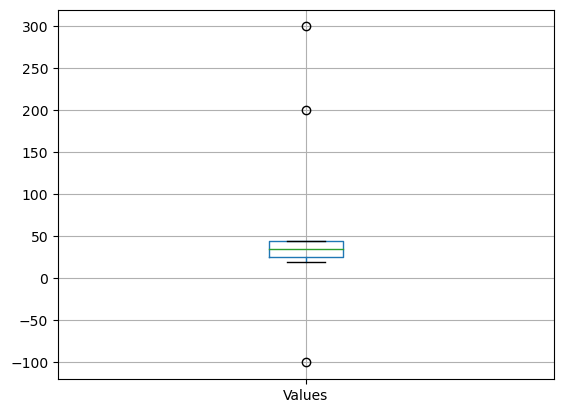

In [9]:
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'Values': [25, 30, 200, 40, 20, 300, 35, 45, -100]}
df = pd.DataFrame(data)

# Box plot to visualize outliers
df.boxplot(column='Values')

## Outlier Handling by NaN
Once you've identified outliers, you can handle them manually. You have a few options. You can replace outlier values with NaN to effectively remove them from calculations. If you decide, here's how to do it.


In [10]:
upper_threshold = 100  # Define your threshold for outliers
lower_threshold = 0
df['Values'][(df['Values'] > upper_threshold) | (df['Values'] < lower_threshold)] = None  # Replace outliers with NaN (|=or)
df     

,Values
0,25.0
1,30.0
2,NaN
3,40.0
4,20.0
5,NaN
6,35.0
7,45.0
8,NaN


## Outlier Handling by Clip Values
Clipping is the process of setting upper and lower bounds on a variable to limit extreme values to a specified range.
It replaces values in the DataFrame with the specified bounds if they fall outside the specified range.



In [11]:
# Create a sample DataFrame
data = {'Values': [25, 30, 200, 40, 20, 300, 35, 45, -100]}
df = pd.DataFrame(data)

# Define upper and lower bounds
lower_bound = 0
upper_bound = 100

# Clip values to the specified bounds
df['Values'] = df['Values'].clip(lower=lower_bound, upper=upper_bound)
df

,Values
0,25
1,30
2,100
3,40
4,20
5,100
6,35
7,45
8,0


 ## Memory Optimization

Optimizing memory usage is crucial when working with large datasets. Pandas provide techniques to reduce memory consumption while maintaining data integrity.

1. Choose the Right Data Types:
* Use appropriate data types for your columns. For example, use int8 or int16 for integer columns with small value ranges, and float32 for floating-point columns.
* Consider using categorical data types for columns with a limited number of unique values. This reduces memory usage and can improve performance when working with categorical data.
2. Use Sparse Data Structures if your data has too many missing values:
* Pandas support sparse data structures, such as SparseDataFrame and SparseSeries, which are suitable for datasets with a lot of missing values.
* Sparse data structures store only non-missing values, reducing memory usage.
3. Read Data in Chunks:
* When reading large datasets from external sources, use the chunksize parameter of functions like read_csv() to read the data in smaller chunks rather than loading the entire dataset into memory at once.
4. Release Unneeded DataFrames:
* Explicitly release memory by deleting DataFrames or Series that are no longer needed, using the del keyword. This frees up memory for other operations.
5. Optimize GroupBy Operations:
* Use the as_index=False parameter when performing GroupBy operations to avoid creating a new index, which can consume additional memory